## HOG Feature Extraction on MNIST Dataset

Loading all required libraries

In [ ]:
import os
import cv2
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

Unzipping the File

In [ ]:
import zipfile

zip_file = "MNIST Dataset JPG format.zip"
unzip_path = "MNIST Dataset JPG format"

# Check if the file has already been unzipped
if not os.path.exists(unzip_path):
    print("Unzipping the dataset...")

    # Open the zip file in read mode
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        # Extract all files to the specified path
        zip_ref.extractall(unzip_path)
else:
    print("The dataset is already unzipped.")

The dataset is already unzipped.


Set paths for the dataset

In [ ]:
base_path = "/content/MNIST Dataset JPG format/MNIST Dataset JPG format"
training_path = os.path.join(base_path, "MNIST - JPG - training")
testing_path = os.path.join(base_path, "MNIST - JPG - testing")

Function to load data and extract HOG features

In [ ]:
def load_and_extract_hog_features(data_path):
    X = []
    y = []

    for label in sorted(os.listdir(data_path)):
        label_path = os.path.join(data_path, label)
        if not os.path.isdir(label_path):
            continue

        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)

            # Read the image in grayscale
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # Resize the image to 28x28 (optional, standard MNIST size)
            image = cv2.resize(image, (28, 28))

            # Extract HOG features
            hog_features = hog(
                image,
                orientations=9,
                pixels_per_cell=(8, 8),
                cells_per_block=(2, 2),
                block_norm='L2-Hys',
                transform_sqrt=True
            )

            # Append features and label
            X.append(hog_features)
            y.append(int(label))

    return np.array(X), np.array(y)

Load training and testing data

In [ ]:
print("Loading and processing training data...")
X_train, y_train = load_and_extract_hog_features(training_path)

print("Loading and processing testing data...")
X_test, y_test = load_and_extract_hog_features(testing_path)

Loading and processing training data...
Loading and processing testing data...


Perform EDA: Distribution of labels

<ipython-input-9-accc1697003a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


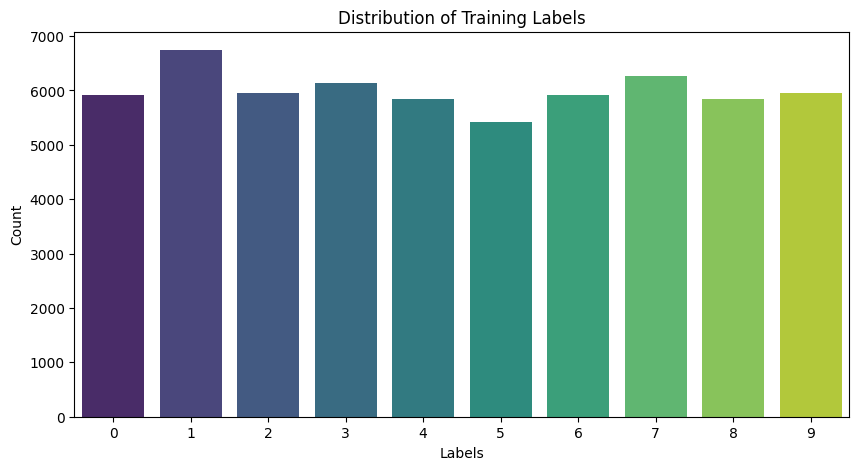

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribution of Training Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()

Define and train multiple models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', C=1.0, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

In [ ]:
results = {}

Final Evaluation of all Models


Training Logistic Regression...
Logistic Regression Accuracy: 0.9324
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.93      0.93      1010
           4       0.93      0.91      0.92       982
           5       0.95      0.93      0.94       892
           6       0.95      0.96      0.95       958
           7       0.93      0.89      0.91      1028
           8       0.90      0.91      0.90       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



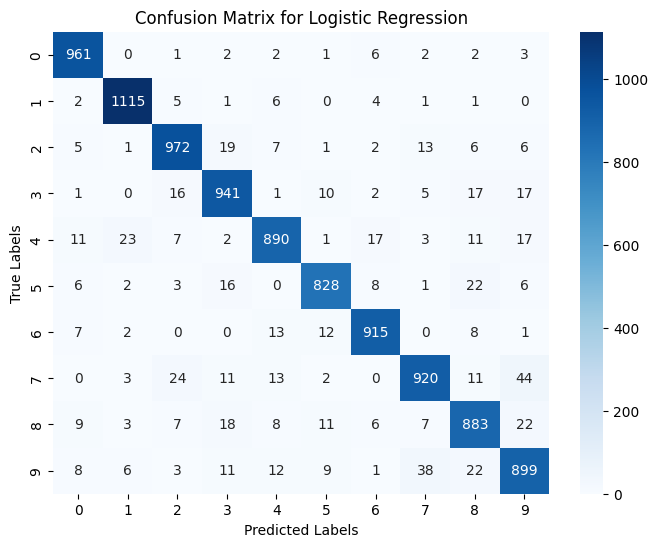


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9458
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.93      0.94      0.93      1010
           4       0.94      0.93      0.93       982
           5       0.96      0.94      0.95       892
           6       0.96      0.97      0.96       958
           7       0.95      0.92      0.93      1028
           8       0.92      0.92      0.92       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



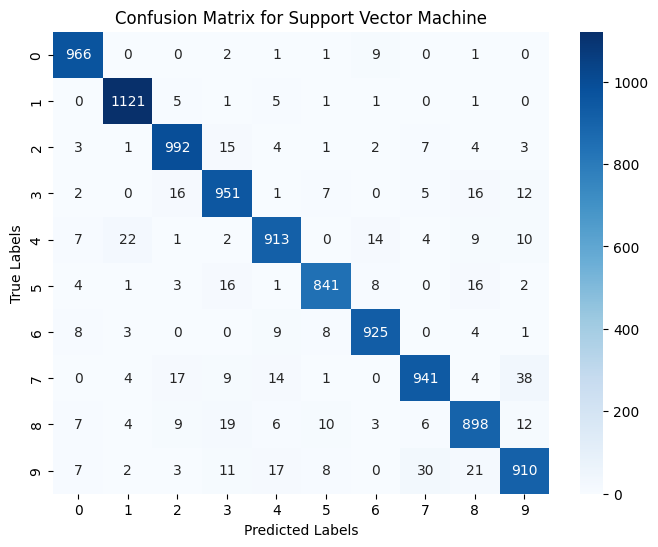


Training Random Forest...
Random Forest Accuracy: 0.9339
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.95      0.95      0.95      1032
           3       0.90      0.92      0.91      1010
           4       0.95      0.92      0.94       982
           5       0.94      0.93      0.93       892
           6       0.96      0.96      0.96       958
           7       0.93      0.91      0.92      1028
           8       0.90      0.89      0.89       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



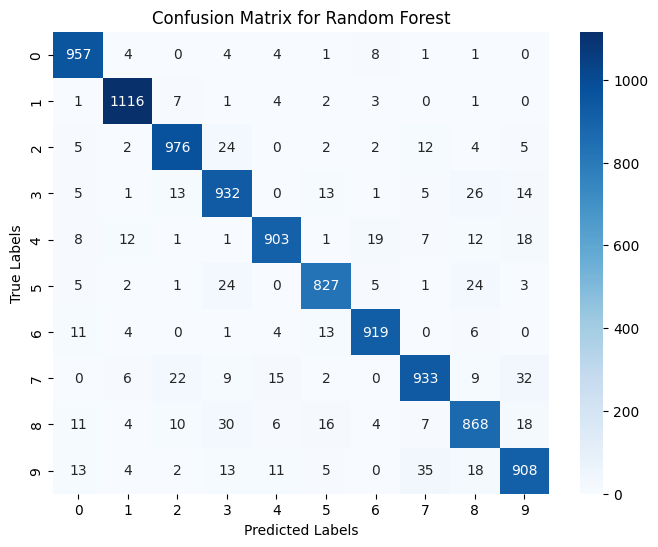


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:38:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9611
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.97      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.95      0.94      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



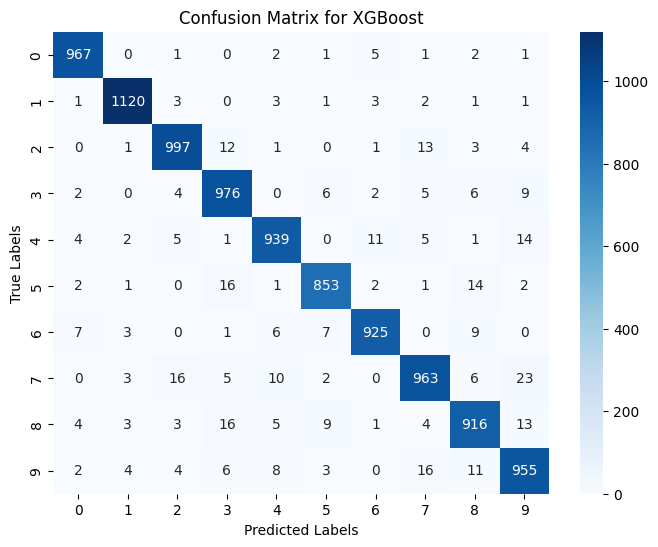


Training Neural Network...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.9575
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.92      0.96      0.94      1010
           4       0.96      0.95      0.95       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.97       958
           7       0.94      0.94      0.94      1028
           8       0.95      0.93      0.94       974
           9       0.94      0.91      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



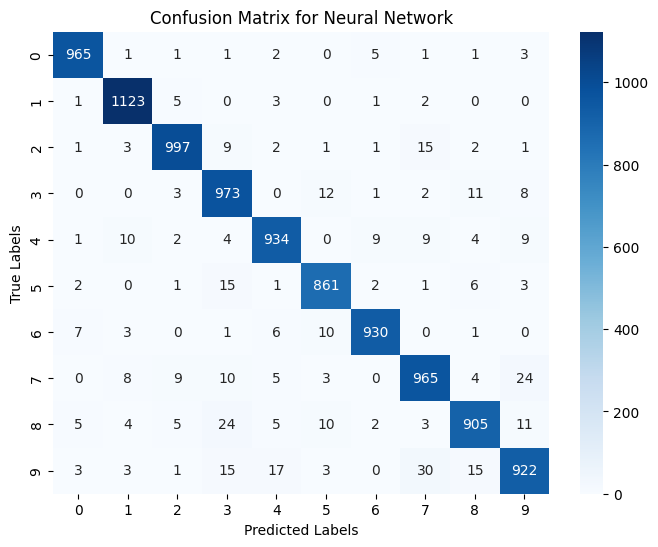

In [ ]:
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

Plot model accuracy comparison

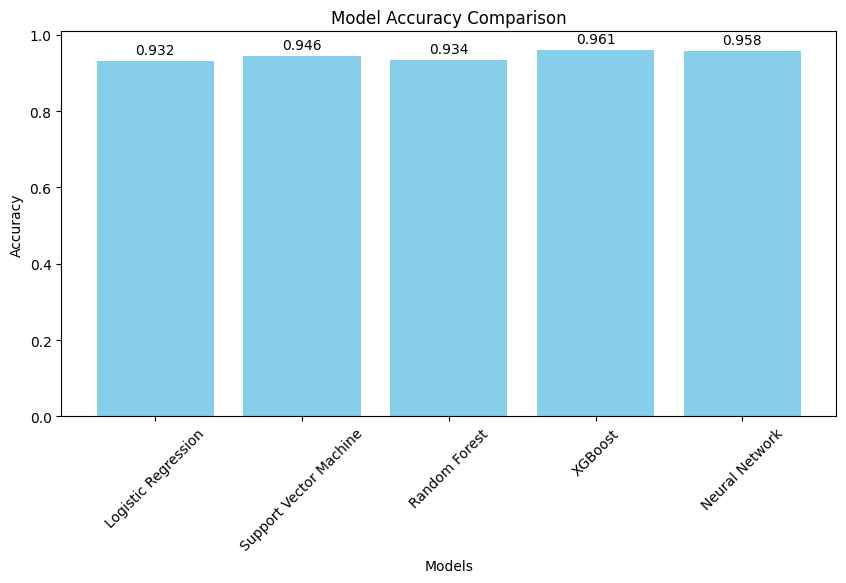

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.show()